In [1]:
directory= "kfold"
domainList = ["art_painting","cartoon","photo","sketch"]
all_data_path=[]
for domain_name in domainList:
    with open(f'{domain_name}_to_label.txt') as f:
        lines = f.readlines()
        for line in lines:
            all_data_path.append( str("kfold/"+line.split()[0]))

In [2]:
len(all_data_path)

400

In [3]:
import json
f = open('labelFile.json')
data = json.load(f)



for each group find uniqe discriptions and usethem to label are files

In [4]:
artpaintDescriptions=[]
cartoonDescriptions=[]
photoDescriptions=[]
sketchDescriptions=[]
for info in data:
    if str(info["image_name"]).startswith("art_painting"):
        artpaintDescriptions.append(info["descriptions"])
    elif str(info["image_name"]).startswith("cartoon"):
        cartoonDescriptions.append(info["descriptions"])
    elif str(info["image_name"]).startswith("photo"):
        photoDescriptions.append(info["descriptions"])
    else:
        sketchDescriptions.append(info["descriptions"])



In [5]:
import pandas as pd
columns = ['Level of details','Edges','Color saturation',
           'Color shades','Background','Single instance',
           'Text','Texture','Perspective']
artPaintingDf = pd.DataFrame(artpaintDescriptions, columns=columns)
photoDf = pd.DataFrame(photoDescriptions, columns=columns)
cartoonDf = pd.DataFrame(cartoonDescriptions, columns=columns)
sketchDf = pd.DataFrame(sketchDescriptions, columns=columns)

In [6]:
artPaintingDf["Level of details"].unique()
artPaintingDf.where(artPaintingDf["Level of details"]=="low level details")

,Level of details,Edges,Color saturation,Color shades,Background,Single instance,Text,Texture,Perspective
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import numpy
hi = artPaintingDf["Edges"].unique()
type(hi)
# numpy.concatenate( hi,axis=0)

numpy.ndarray

In [8]:
artPaintingDf["Color saturation"].unique()

array(['intense saturation harmonious saturated vibrant vivid',
       'intense saturation dark', 'medium saturation', 'low saturation',
       'intense saturation bright vivid',
       'harmonious saturation vivid natural', 'high saturation',
       'intense saturation vibrant saturated',
       'high saturation, vivid colors', 'intense saturation cool',
       'intense saturation contrasting cold graduated dark',
       'harmonious saturation vivid warm light',
       'intense saturation contrasting bright',
       'intense saturation rich bright',
       'high saturation, rich vivid colors',
       'intense saturation bright rich vibrant',
       'intense saturation rich inspid', 'intense saturation vivid',
       'intense saturation, dark, rich, cold',
       'intense saturation inspid contrasting rich',
       'intense saturation contrasting',
       'vivid saturation black graduated contrasting',
       'intense saturation, vivid, rich',
       'weak saturation inspid graduated',

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
img = cv.imread(all_data_path[0])
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
# image properties
# cv.imshow('image', img)
print("Type:",type(img))
print("Shape of Image:", img.shape)
print('Total Number of pixels:', img.size)
print("Image data type:", img.dtype)

# print("Pixel Values:\n", img)
print("Dimension:", img.ndim)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
saturation = img_hsv[:, :, 1].mean()
print("image Saturation", saturation)

In [84]:
def checkColorShade(img):
    b,g,r=cv.split(img)
    r_g=np.count_nonzero(abs(r-g))
    r_b=np.count_nonzero(abs(r-b))
    g_b=np.count_nonzero(abs(g-b))

### sum of differences
    diff_sum=float(r_g+r_b+g_b)

### finding ratio of diff_sum with respect to size of image
    ratio=diff_sum/img.size

    if ratio>0.005:
        print("Yes, colorful")
       
        
    else:
        print("no, grayscale")
    

In [85]:
def getImagedetail(path):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    img = cv.imread(path)
    assert img is not None, "file could not be read, check with os.path.exists()"
    color = ('b','g','r')
    sum=0
    for i,col in enumerate(color):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        hi = np.unique(histr,axis=0).size

        ax1.plot(histr,color = col)
        ax1.set_title(f'RGB representation')
#         ax1.xlim([0,256])
        sum += hi
    
    color = ('c','m','y')
    sum1=0
    img2 = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    for i,col in enumerate(color):
        histr = cv.calcHist([img2],[i],None,[256],[0,256])
        hi = np.unique(histr,axis=0).size
        ax1.set_title(f'HSV representation')
        ax2.plot(histr,color = col)
#         ax2.xlim([0,256])
        sum1 += hi
    plt.xlim([0,256])
    plt.show()

       
    # image properties
    print("Type:",type(img))
    print("Shape of Image:", img.shape)
    print('Total Number of pixels:', img.size)
    print("Image data type:", img.dtype) 
    print("Dimension:", img.ndim)
    print("colorUsed", sum)
    saturation = img2[:, :, 1].mean()
    print("image Saturation", saturation)
    imgHLS = cv.cvtColor(img, cv.COLOR_BGR2HLS)
    lightness =imgHLS[:,:,1].mean()
#     closer too 250-255 more white  
    print("image lightness", lightness)
    checkColorShade(img)

    


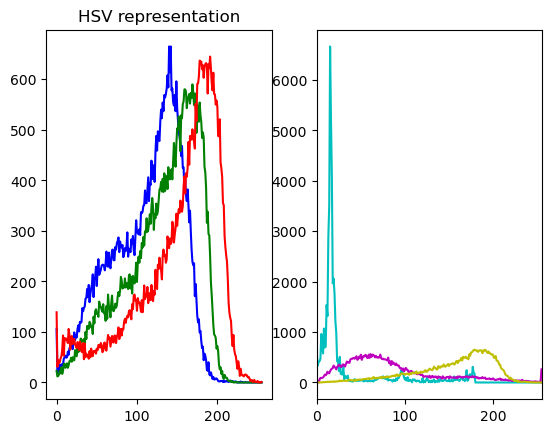

Type: <class 'numpy.ndarray'>
Shape of Image: (227, 227, 3)
Total Number of pixels: 154587
Image data type: uint8
Dimension: 3
colorUsed 529
image Saturation 83.2257563701993
image lightness 131.92260668749637
image is color


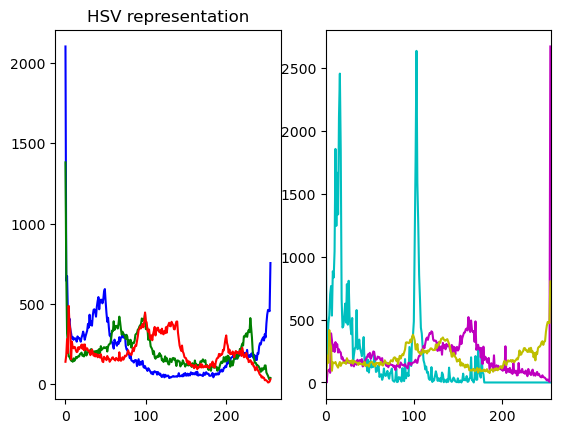

Type: <class 'numpy.ndarray'>
Shape of Image: (227, 227, 3)
Total Number of pixels: 154587
Image data type: uint8
Dimension: 3
colorUsed 506
image Saturation 124.8205088396825
image lightness 108.27863921287042
image is color


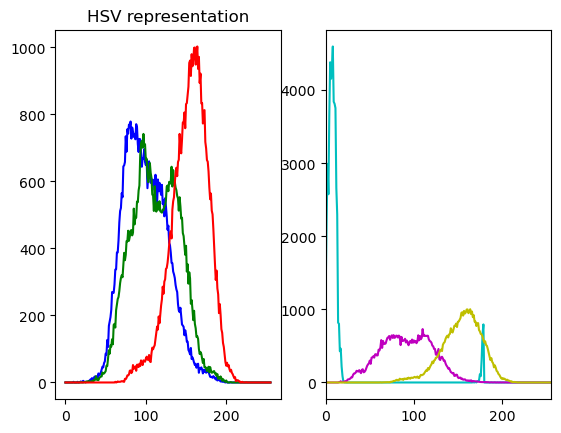

Type: <class 'numpy.ndarray'>
Shape of Image: (227, 227, 3)
Total Number of pixels: 154587
Image data type: uint8
Dimension: 3
colorUsed 408
image Saturation 92.04713850453143
image lightness 127.14135729395097
image is color


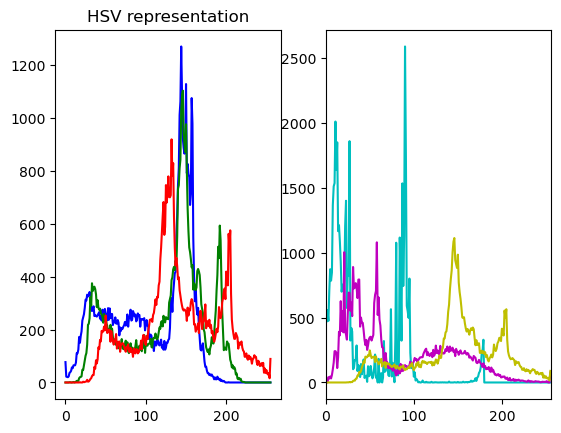

Type: <class 'numpy.ndarray'>
Shape of Image: (227, 227, 3)
Total Number of pixels: 154587
Image data type: uint8
Dimension: 3
colorUsed 496
image Saturation 82.45628675114983
image lightness 124.50288187234374
image is color


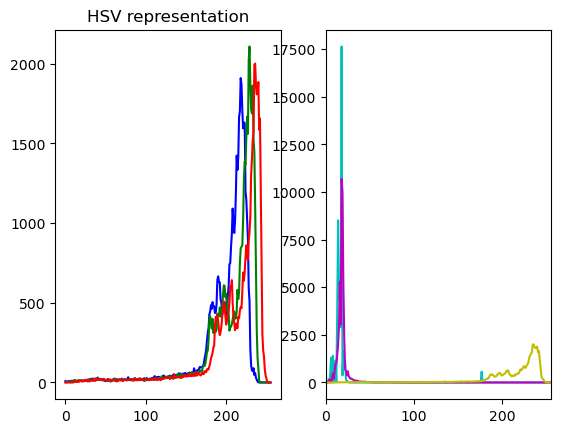

Type: <class 'numpy.ndarray'>
Shape of Image: (227, 227, 3)
Total Number of pixels: 154587
Image data type: uint8
Dimension: 3
colorUsed 372
image Saturation 18.912554095751908
image lightness 207.9323487744765
image is color


In [83]:
#high detaild
getImagedetail("kfold/art_painting/guitar/pic_023.jpg")

getImagedetail("kfold/art_painting/house/pic_269.jpg")
#mide
getImagedetail("kfold/art_painting/person/pic_474.jpg")
getImagedetail("kfold/art_painting/giraffe/pic_038.jpg")
#lowLevel
getImagedetail("kfold/art_painting/dog/pic_276.jpg")

# scatch


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


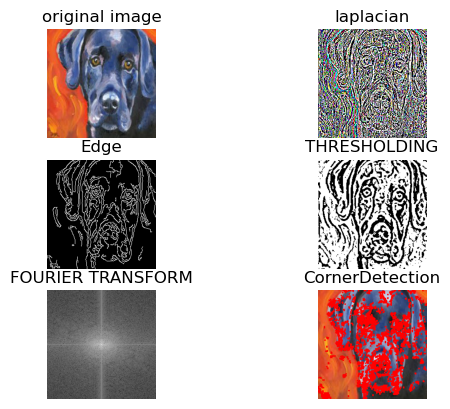

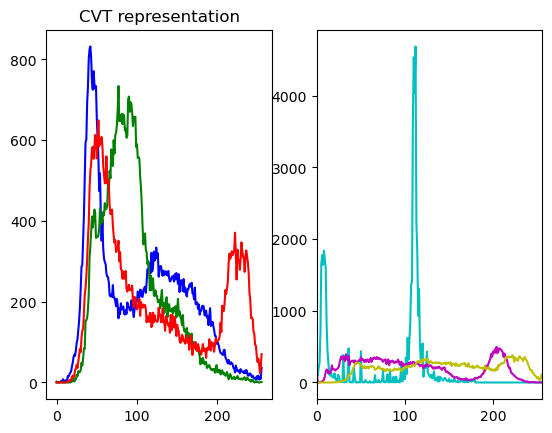

Type: <class 'numpy.ndarray'>
Shape of Image: (227, 227, 3)
Total Number of pixels: 154587
Image data type: uint8
Dimension: 3
colorUsed 550
image Saturation 110.93848124357159


In [68]:

for i in all_data_path:
    fig, axs = plt.subplots(3, 2)
    img = cv.imread(i)
    axs[0,0].set_title(f'original image')
    axs[0,0].axis('off')
    axs[0,0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    axs[0,1].set_title(f'laplacian')
    axs[0,1].axis('off')
    laplacian = cv.Laplacian(img, cv.CV_64F)
    axs[0,1].imshow(cv.cvtColor(laplacian.astype('float32'), cv.COLOR_BGR2RGB))
    axs[1,0].set_title(f'Edge')
    axs[1,0].axis('off')
    edges = cv.Canny(img, threshold1 = 100, threshold2 = 200)
    axs[1,0].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))
    axs[1,1].set_title(f'THRESHOLDING')
    axs[1,1].axis('off')
    denoised_img = cv.medianBlur(img, 5)
    hi = denoised_img.astype(np.uint8)
    img_grey = cv.cvtColor(hi, cv.COLOR_BGR2GRAY)
    th = cv.adaptiveThreshold(img_grey, maxValue = 255, 
                               adaptiveMethod = cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                               thresholdType = cv.THRESH_BINARY, blockSize = 11, C = 2)
    axs[1,1].imshow(cv.cvtColor(th, cv.COLOR_BGR2RGB))
    axs[2,0].set_title(f'FOURIER TRANSFORM')
    axs[2,0].axis('off')
    freq = np.fft.fft2(img_grey)
    freq_shift = np.fft.fftshift(freq)
    magnitude_spectrum = 30 * np.log(np.abs(freq_shift))
    axs[2,0].imshow(magnitude_spectrum,cmap = 'gray')
    axs[2,1].set_title(f'CornerDetection')
    axs[2,1].axis('off')
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
   
    gray = np.float32(gray)
    corners = cv.cornerHarris(gray, blockSize = 2, ksize = 3, k = 0.04)
    corners = cv.dilate(corners, None)
    img_copy = img.copy()
    img_copy[corners > 0.0001 * corners.max()] = [0, 0, 255]
    axs[2,1].imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
    plt.show()
    getImagedetail(i)

    break